## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [7]:
train.shape

AttributeError: ignored

In [8]:
test.shape

AttributeError: ignored

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

In [10]:
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

In [11]:
# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [15]:
print(x_train)
print('--------------------------------------------------------------------------')
print(x_test)

[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
--------------------------------------------------------------------------
[[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.07843137 0.05882353 0.04705882 ... 0.09803922 0.07843137 0.18431373]
 [0.09803922 0.15686275 0.04705882 ... 0.36078431 0.47058824 0.31372549]
 [0.28627451 0.30588235 0.29411765 ... 0.10588235 0.10196078 0.10196078]]


In [16]:
# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]]) #輸入層
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)  #全連接層1
    x = keras.layers.Dense(units=256, activation="relu")(x)    #全連接層2
    x = keras.layers.Dense(units=128, activation="relu")(x)    #全連接層3
    out = keras.layers.Dense(units=10, activation="softmax")(x)    #輸出層，必須10維(因為目標函數的設定)
    
    #實例化一個模型
    # https://keras.io/zh/models/model/
    model = keras.Model(inputs=[input_layer], outputs=[out])

    return model

In [28]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [29]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [30]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 9s 44ms/step - loss: 2.2610 - accuracy: 0.1592 - val_loss: 2.2121 - val_accuracy: 0.2053
Epoch 2/500
196/196 [==============================] - 8s 43ms/step - loss: 2.1809 - accuracy: 0.2247 - val_loss: 2.1499 - val_accuracy: 0.2489
Epoch 3/500
196/196 [==============================] - 8s 43ms/step - loss: 2.1264 - accuracy: 0.2500 - val_loss: 2.1023 - val_accuracy: 0.2681
Epoch 4/500
196/196 [==============================] - 8s 43ms/step - loss: 2.0832 - accuracy: 0.2679 - val_loss: 2.0638 - val_accuracy: 0.2848
Epoch 5/500
196/196 [==============================] - 8s 42ms/step - loss: 2.0469 - accuracy: 0.2833 - val_loss: 2.0298 - val_accuracy: 0.2954
Epoch 6/500
196/196 [==============================] - 8s 43ms/step - loss: 2.0155 - accuracy: 0.2950 - val_loss: 2.0011 - val_accuracy: 0.3052
Epoch 7/500
196/196 [==============================] - 8s 43ms/step - loss: 1.9890 - accuracy: 0.3041 - val_loss: 1.9779 - val_accuracy:

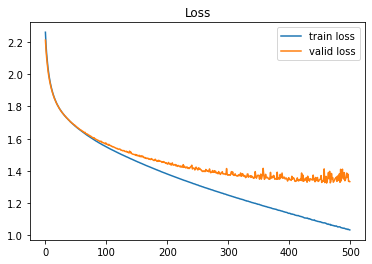

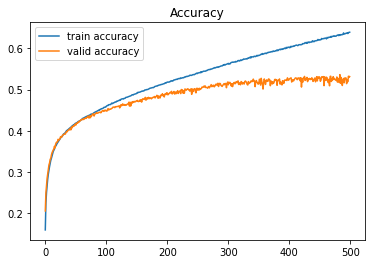

In [32]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()